In [226]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [227]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [228]:
# Get the data dimension
df.shape

(2240, 29)

In [229]:
# Quick summary of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [230]:
# Summary of missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [231]:
# Drop all the missing values
df.dropna(inplace=True)
# Covert into a datetime object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst=True)
# Removes any leading or trailing spaces
df.columns = df.columns.str.strip()

In [232]:
# Summary statistics for numerical variables
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2216  2216.000000  2216.000000  2216.000000   
mean   2013-07-10 11:29:27.509025280    49.012635   305.091606    26.356047   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    24.000000     2.000000   
50%              2013-07-08 12:00:00    49.000000   174.500000     8.000000   
75%              2013-12-31 00:00:00    74.000000   505.000000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.948352   337.327920    39.793917   

       MntMeatProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2216.000000  ...        2216.000000   2216.000000   2216.000000   
mean        166.995939  ...           5.319043      0.073556      0.074007   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%          16.000000  ...           3.000000      0.000000      0.000000   
50%          68.000000  ...           6.000000      0.000000      0.000000   
75%         232.250000  ...           7.000000      0.000000      0.000000   
max        1725.000000  ...          20.000000      1.000000      1.000000   
std         224.283273  ...           2.425359      0.261106      0.261842   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2216.000000   2216.000000   2216.000000  2216.000000         2216.0   
mean       0.073105      0.064079      0.013538     0.009477            3.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   
std        0.260367      0.244950      0.115588     0.096907            0.0   

       Z_Revenue     Response  
count     2216.0  2216.000000  
mean        11.0     0.150271  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  
std          0.0     0.357417  

[8 rows x 27 columns]

In [233]:
# Summary statistics for categorical variables
df.describe(include='object')

Education Marital_Status
count         2216           2216
unique           5              8
top     Graduation        Married
freq          1116            857

From the table we can see that most costumers are graduates and married.

## Feature Engineering
Now the data is cleaned, let's create new features that will help in clustering and understanding customer behavior.

In [234]:
# Extracting the customer's age using the year of birth. I am Assuming the data is from 2021, so we subtract year_of_birth from 2021 to avoid any outliers falsely generated due to data being older.
df['Age'] = 2021 - df['Year_Birth']

# Combining kids and teens at home to get the total number of children
df['Children'] = df['Kidhome'] + df['Teenhome']

# Calculating how long a customer has been with the company 
df['Customer_Since'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

In [235]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [236]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [237]:
# Group education levels
df['Education'] = df['Education'].replace({
    'Graduation': 'Graduate',
    'Master': 'Postgraduate',
    'PhD': 'Postgraduate',  
    '2n Cycle': 'Postgraduate',
    'Basic': 'Undergraduate'
})

# Group marital status
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single'
})

In [238]:
# Get family size
df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + df['Marital_Status'].apply(lambda x: 2 if x == 'Partnered' else 1)

In [239]:
# Get the total number of campaigns selected by each customer
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['TotalAcceptedCmp'] = df[campaigns].sum(axis=1)

# Get the total money spent by each customer (Monetary)
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Get how often each customer buys (Frequency)
df['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [240]:
# Columns to drop because we have already derived useful features from them
drop_cols = [
    'Year_Birth', 'Dt_Customer','Kidhome', 'Teenhome',  'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5',
    'Z_CostContact'	,'Z_Revenue'
]
df.drop(columns=drop_cols, inplace=True)


In [241]:
df.shape

(2216, 16)

In [242]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumDealsPurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Children', 'Customer_Since', 'Family_Size', 'TotalAcceptedCmp',
       'Monetary', 'Frequency'],
      dtype='object')

## Data Cleaning and Visulization

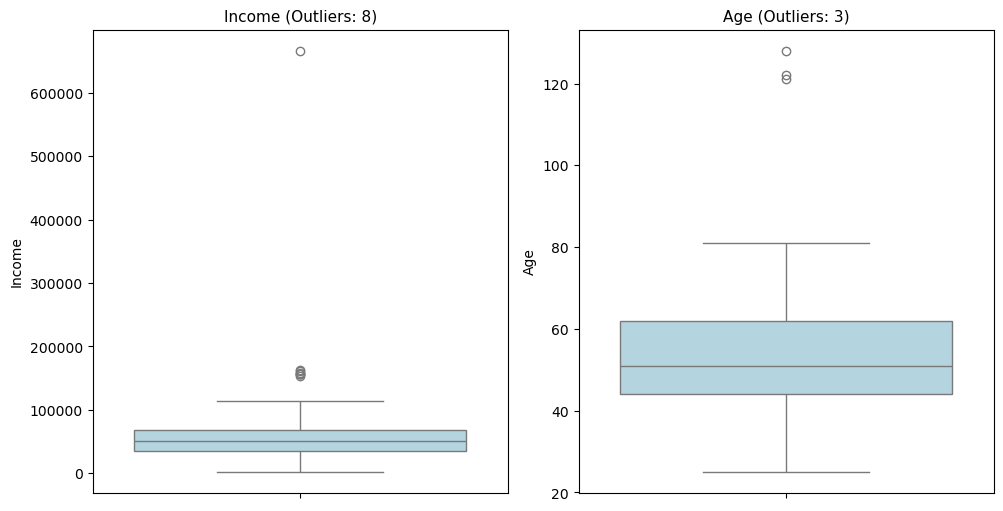

Outlier Count Summary:

Income: 8 outliers
Age: 3 outliers


In [243]:
# Copy the DataFrame
df_vis = df.copy()
# Columns to check for outliers
columns_to_check = ['Income', 'Age']

# Prepare a dictionary
outlier_summary = {}

plt.figure(figsize=(15, 10))

# Loops through each column in columns_to_check
# While also keeping track of the loop index (idx)
for idx, col in enumerate(columns_to_check):
    Q1 = df_vis[col].quantile(0.25)
    Q3 = df_vis[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df_vis[(df_vis[col] < lower) | (df_vis[col] > upper)]

    # Saves the number of outliers found for each column into dictionary
    outlier_summary[col] = len(outliers)

    plt.subplot(2, 3, idx + 1)
    sns.boxplot(y=df_vis[col], color='lightblue')
    plt.title(f"{col} (Outliers: {len(outliers)})", fontsize=11)
    plt.tight_layout()

plt.show()

print('Outlier Count Summary:\n')
for col, count in outlier_summary.items():
    print(f'{col}: {count} outliers')

In [244]:
columns_to_cap = ['Income', 'Age']

for col in columns_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Caps outliers in 'Income' and 'Age' columns at 
    # the IQR-based lower/upper bounds using vectorized np.where
    df[col] = np.where(df[col] > upper, upper,
               np.where(df[col] < lower, lower, df[col]))

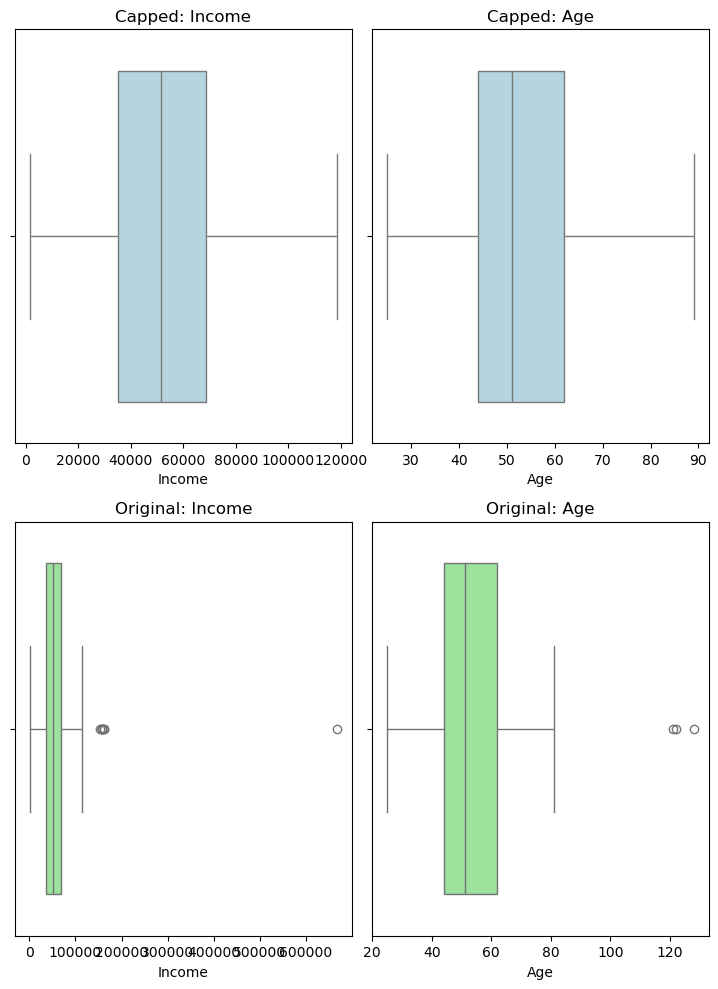

In [245]:
plt.figure(figsize=(18, 10))
for i, col in enumerate(columns_to_cap, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Capped: {col}')
    
    plt.subplot(2, 5, i+5)
    sns.boxplot(x=df_vis[col], color='lightgreen')
    plt.title(f'Original: {col}')

plt.tight_layout()
plt.show()

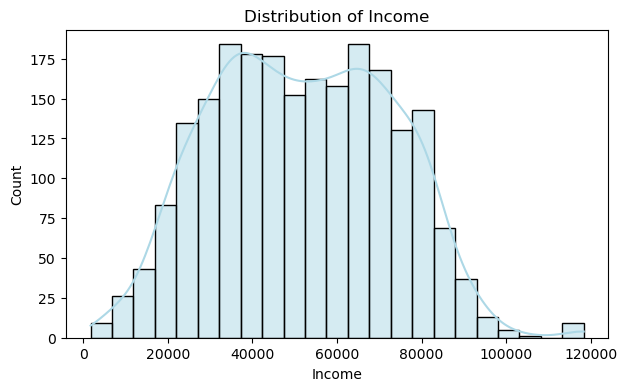

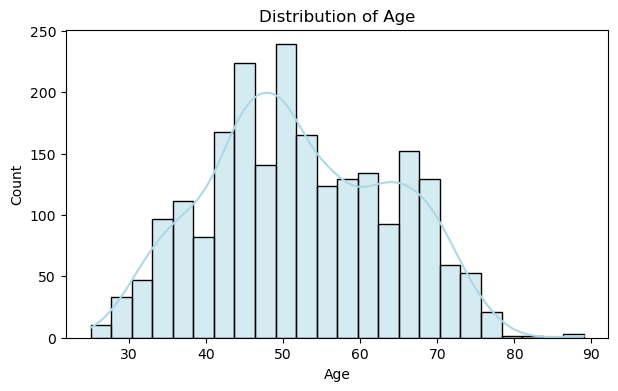

In [246]:
num_cols = ['Income', 'Age']
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, color='lightblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

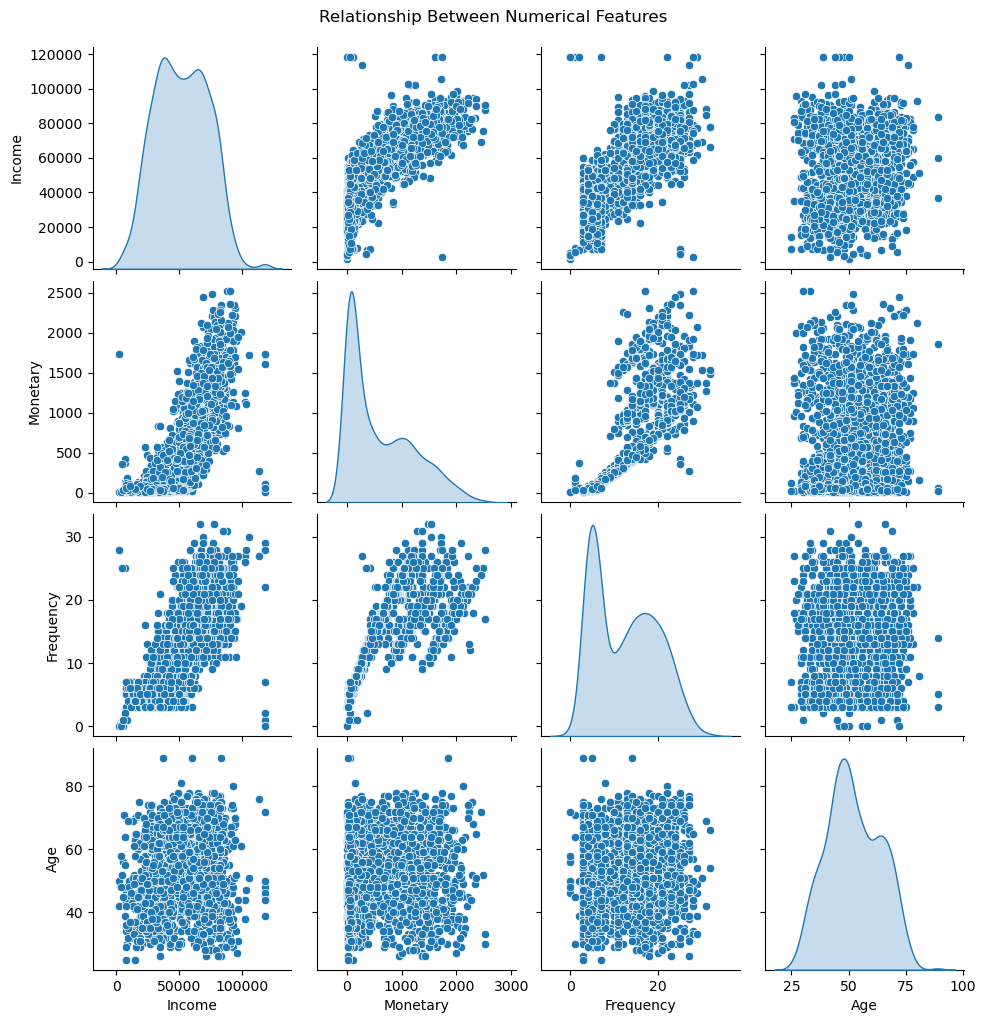

In [247]:
sns.pairplot(df, vars=['Income', 'Monetary', 'Frequency', 'Age'], diag_kind='kde')
plt.suptitle('Relationship Between Numerical Features', y=1.02)
plt.show()

From the plot, we can see that income is positively correlated with spending and frequency — higher income is associated with more frequent purchases and higher spending.

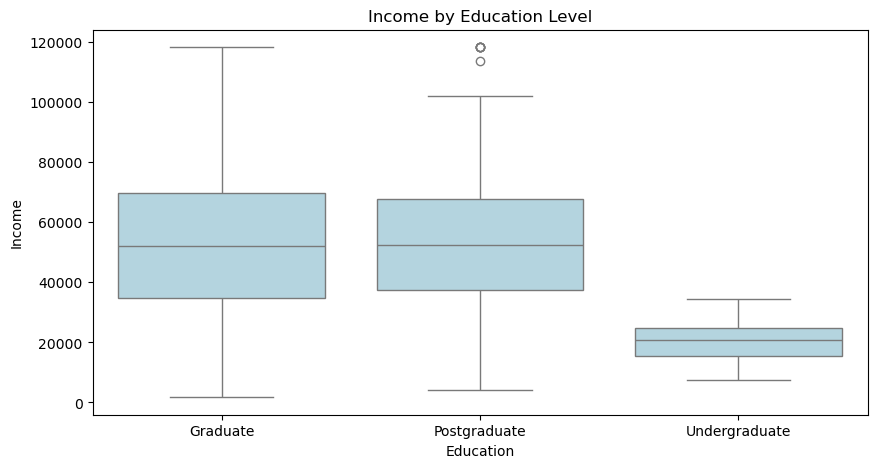

In [248]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Education', y='Income', data=df,color='lightblue')
plt.title('Income by Education Level')
plt.show()

Income varies by education level: undergraduates mostly earn less than 35K, graduates have a wider income range between 0 and 120K, while postgraduates' incomes can reach up to 150K, with a few high outliers.

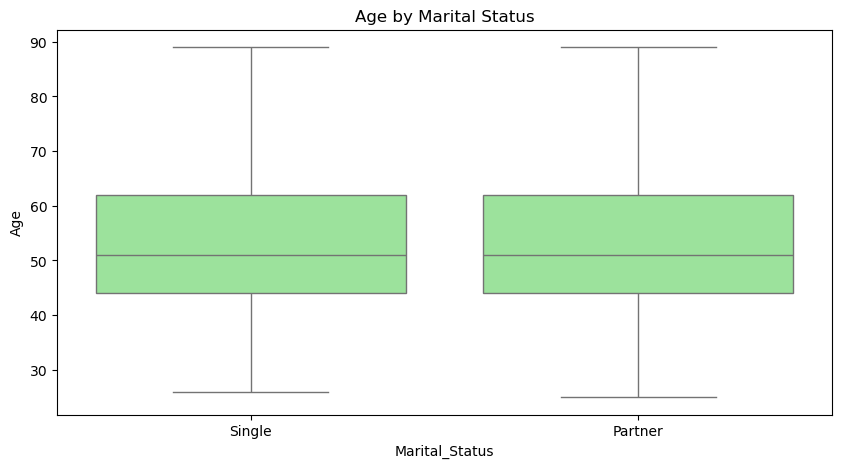

In [249]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Marital_Status', y='Age', data=df,color='lightgreen')
plt.title('Age by Marital Status')
plt.show()

The age distribution is fairly balanced between singles and those who are partnered.

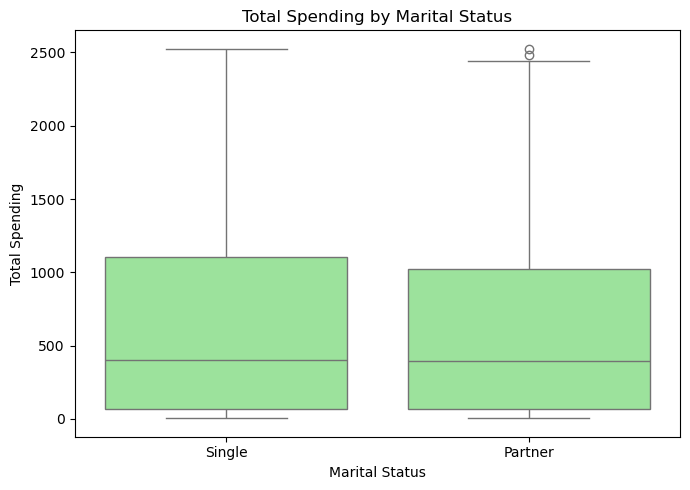

In [250]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Marital_Status', y='Monetary', data=df, color='lightgreen')
plt.title('Total Spending by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.show()


In [251]:
print(df.groupby('Marital_Status')['Monetary'].mean()) 

Marital_Status
Partner    598.429371
Single     622.805344
Name: Monetary, dtype: float64


From the boxplot, we can see that both groups spend similarly. Singles spend slightly more than partners, on average.

## RFM

In [252]:
rfm = df[['ID', 'Recency', 'Frequency', 'Monetary']].copy()
rfm.set_index('ID', inplace=True) # Set the column ID as the index of DataFrame
rfm.head() # Displays the first 5 rows

Recency  Frequency  Monetary
ID                                
5524       58         22      1617
2174       38          4        27
4141       26         20       776
6182       26          6        53
5324       94         14       422

In [253]:
rfm.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

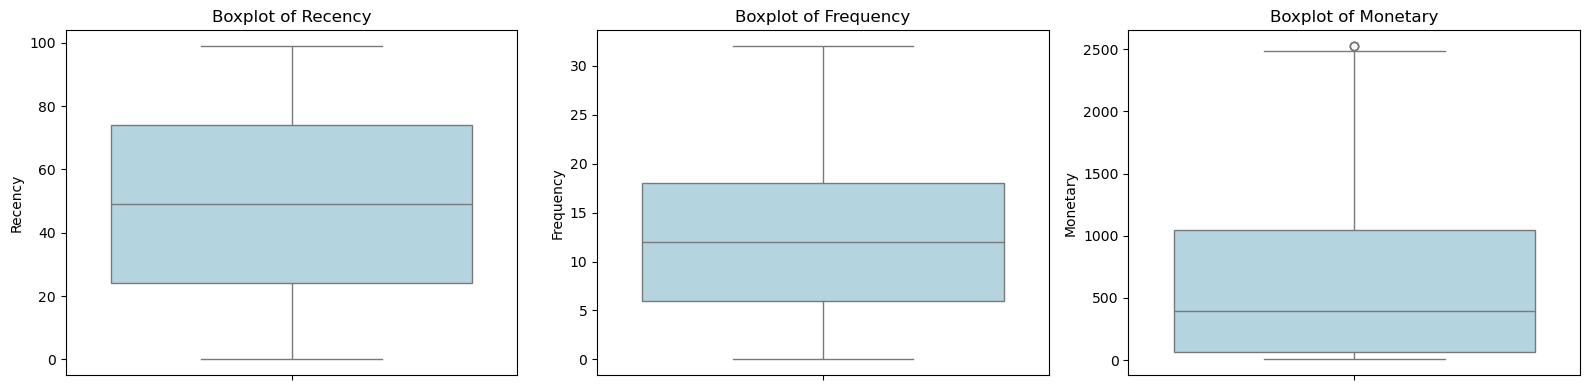

In [254]:
plt.figure(figsize=(16, 4)) # Create a new figure (the plotting canvas)

for i, col in enumerate(rfm.columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=rfm[col], color="lightblue")
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [255]:
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

print("Outlier Counts in RFM Features:")
for col in rfm.columns:
    print(f"{col}: {count_outliers_iqr(rfm[col])} outliers")

Outlier Counts in RFM Features:
Recency: 0 outliers
Frequency: 0 outliers
Monetary: 3 outliers


In [256]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.apply(lambda x: upper if x > upper else (lower if x < lower else x))

# Capping the outliers of Monetary
rfm['Monetary_Capped'] = cap_outliers(rfm['Monetary']) 

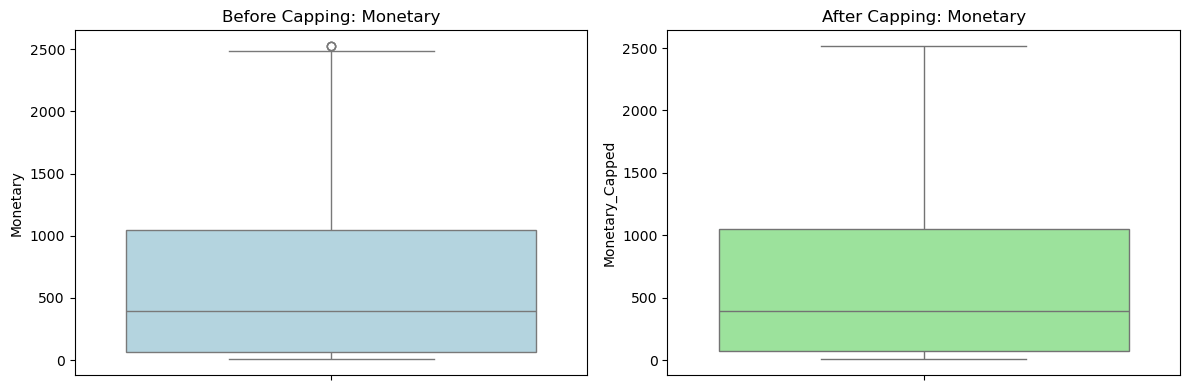

In [257]:
plt.figure(figsize=(12, 4))

# Before Capping
plt.subplot(1, 2, 1)
sns.boxplot(y=rfm['Monetary'], color='lightblue')
plt.title('Before Capping: Monetary')

# After Capping
plt.subplot(1, 2, 2)
sns.boxplot(y=rfm['Monetary_Capped'], color='lightgreen')
plt.title('After Capping: Monetary')

plt.tight_layout()
plt.show()

In [258]:
# Replace the Monetary_Capped with Monetary, and drop the Monetary_Capped
rfm['Monetary'] = rfm['Monetary_Capped']
rfm.drop('Monetary_Capped', axis=1, inplace=True)

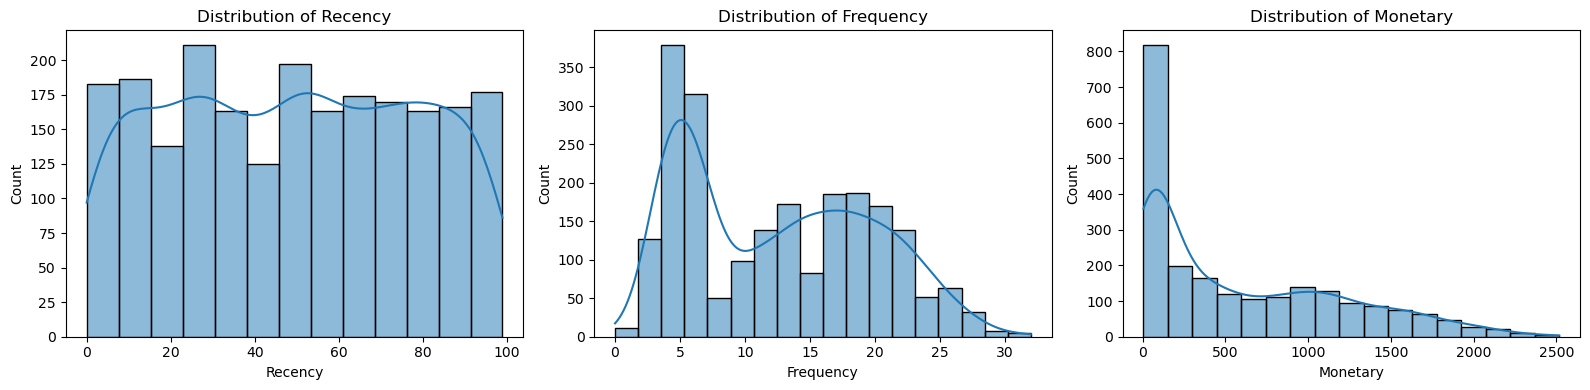

In [259]:
plt.figure(figsize=(16,4))

for i, col in enumerate(rfm.columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

From the plots above, we can see that Frequency and Monetary are right-skewed. To improve clustering performance, we will apply a log transformation next.

In [260]:
rfm_log = rfm.copy() # Make a copy of the DataFrame
# Apply the log transformation
rfm_log['Recency'] = np.log1p(rfm_log['Recency'])
rfm_log['Frequency'] = np.log1p(rfm_log['Frequency'])
rfm_log['Monetary'] = np.log1p(rfm_log['Monetary'])

In [261]:
# Create the scaler
scaler = StandardScaler()
# Fit and standardized data
rfm_scaled = scaler.fit_transform(rfm_log)
# Convert back to DataFrame (Use this to perform KMeans)
rfm_scaled_df = pd.DataFrame(rfm_scaled, index = rfm.index , columns=rfm.columns)

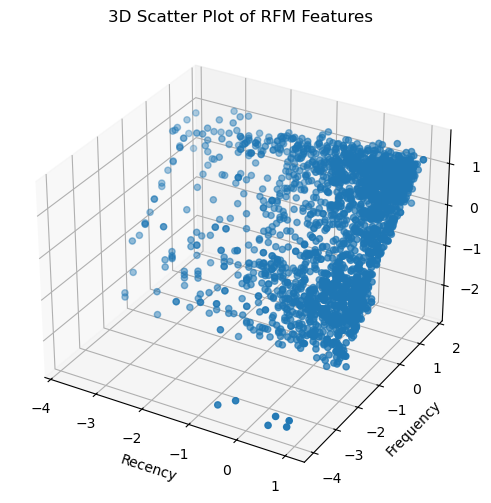

In [262]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(rfm_scaled_df['Recency'], rfm_scaled_df['Frequency'], rfm_scaled_df['Monetary'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.set_title('3D Scatter Plot of RFM Features')
plt.show()

## KMeans Clustering

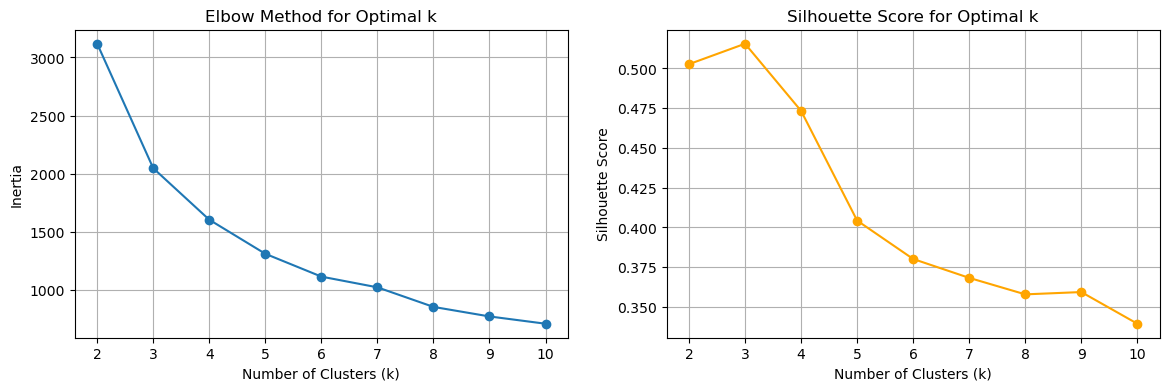

In [263]:
# Finding the optimal number of clusters for K-Means Clustering using 
# both the Elbow method (inertia) and Silhouette score
inertia = []
silhouette_scores = []
# Start at 2 because the silhouette score is undefined for 1 cluster
k_values = range(2, 11) # Testing number of clusters from 2 to 10 


for k in k_values:
    # Initializes a KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fits the KMeans algorithm on the scaled RFM data
    cluster_lables = kmeans.fit_predict(rfm_scaled_df)

    # Find a optimal k that
    # 1. Is near the elbow (inertia not decreasing much after this point)
    # 2. Has a high silhouette score (clusters are well-separated)
    # Calculates Silhouette Score for the clustering
    sil_score = silhouette_score(rfm_scaled_df, cluster_lables)
    # Stores the Silhouette Score for this k in the list.
    silhouette_scores.append(sil_score)
    # Stores the inertia for this K in the list. 
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()

From the Elbow curve and Silhouette scores: The inertia curve shows a noticeable elbow at k=3 and Silhouette score is also higher for k=3. So, we will go ahead with k=3 clusters.

In [264]:
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit and Assign each customer to a cluster 
cluster_labels = kmeans.fit_predict(rfm_scaled_df)
# Cluster labels for each customer
cluster_labels

array([1, 0, 1, ..., 1, 2, 0], dtype=int32)

In [265]:
rfm['Cluster'] = cluster_labels

In [266]:
# Merge the column of cluster labels from the RFM DataFrame into the original DataFrame
df.set_index('ID', inplace=True)
df = df.join(rfm['Cluster'], how='inner') 

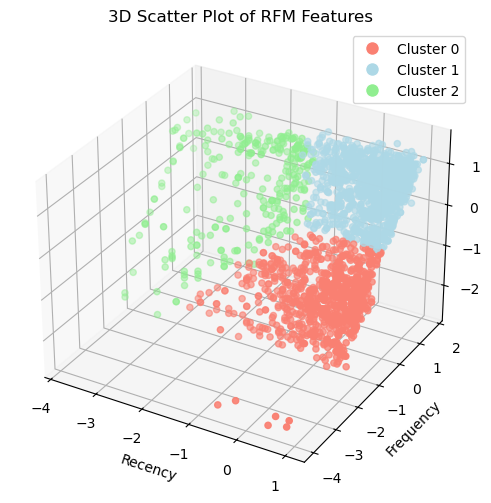

In [267]:
# Define cluster colors
cluster_colors = {0: 'salmon', 1: 'lightblue', 2: 'lightgreen'}
colors = df['Cluster'].map(cluster_colors)

# Create 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    rfm_scaled_df['Recency'], 
    rfm_scaled_df['Frequency'], 
    rfm_scaled_df['Monetary'], 
    c=colors, 
    marker='o'
)

# Axis labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot of RFM Features')

# Create custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', label='Cluster 0', markersize=10),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', label='Cluster 1', markersize=10),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', label='Cluster 2', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()

In [268]:
# Converts the Cluster column to integers
df['Cluster'] = df['Cluster'].astype(int)
rfm['Cluster'] = rfm['Cluster'].astype(int)

## Cluster Analysis and Profiling

In [269]:
# Group by cluster and calculate averages
rfm_summary = df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
# Add number of customers per cluster
rfm_summary['NumCustomers'] = df['Cluster'].value_counts().sort_index()
# Reset the index
rfm_summary = rfm_summary.reset_index()
# Print the summary
print(rfm_summary)

   Cluster  Recency  Frequency  Monetary  NumCustomers
0        0    52.93       5.19     70.74           845
1        1    56.89      17.85   1001.88          1094
2        2     5.94      14.13    683.93           277


Cluster 0: These are low-value or hesitant customers. They are inactive, buy rarely, and spend little — they may need re-engagement campaigns to prevent churn.

Cluster 1: These are high-value but at-risk customers. They normally buy often and spend a lot, but their last purchase was some time ago — they may churn if not re-engaged.

Cluster 2: These are engaged, loyal, and valuable customers. They purchase frequently, spend well, and are recently active — the most desirable segment.

In [271]:
# Map cluster numbers to labels
rfm_summary['RFM_Level'] = rfm_summary['Cluster'].map({
    0: 'Low-Value / Hesitant',
    1: 'High-Value / At-Risk',
    2: 'Engaged / VIP'
})
# Merge the RFM_Level back into the original DataFrame
df = df.merge(rfm_summary[['Cluster', 'RFM_Level']], on='Cluster', how='left')


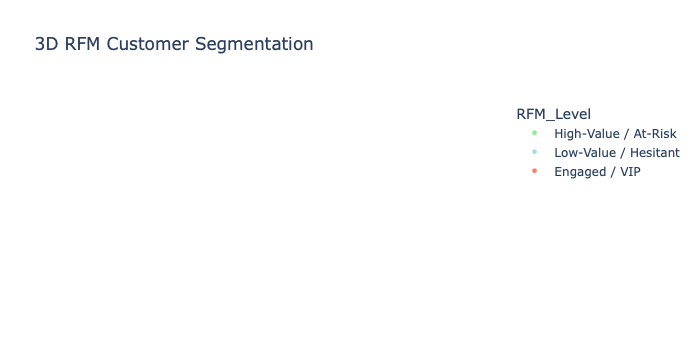

In [272]:
fig = px.scatter_3d(
    df,
    x='Recency', y='Frequency', z='Monetary',
    color='RFM_Level',
    color_discrete_map={'Low-Value / Hesitant': 'lightblue', 'High-Value / At-Risk': 'lightgreen', 'Engaged / VIP': 'salmon'},
    title='3D RFM Customer Segmentation'
)
fig.update_traces(marker=dict(size=5))
fig.show()

RFM_Level
High-Value / At-Risk    0.49
Low-Value / Hesitant    0.38
Engaged / VIP           0.12
Name: proportion, dtype: float64


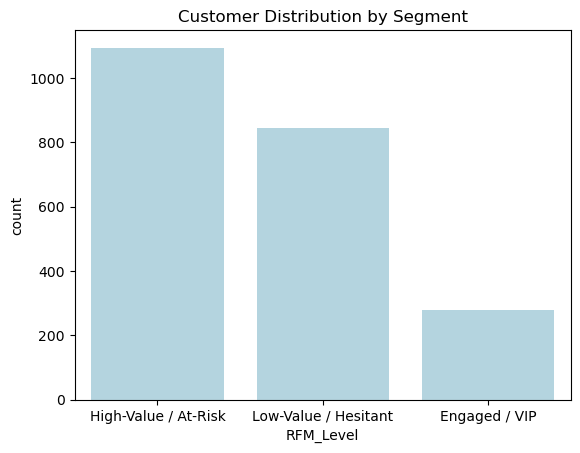

In [273]:
# Display the proportion of each RFM segment
print(df['RFM_Level'].value_counts(normalize=True).round(2))

# Plot the customer distribution
sns.countplot(data=df, x='RFM_Level',color='lightblue')
plt.title('Customer Distribution by Segment')
plt.show()

Segment Distribution: 

1. High-Value / At-Risk segment dominates with 49% of customers — they are frequent and high-spending customers, but their last purchase was some time ago, so they are at risk of churn and need re-engagement.

2. Low-Value / Hesitant segment makes up 38% of customers — they purchase infrequently and spend little, showing low engagement.

3. Engaged / VIP segment, although only 12% of customers, are very recently active, frequent, and high-spending — this group is loyal and highly valuable, offering the most opportunity for upselling or loyalty programs.


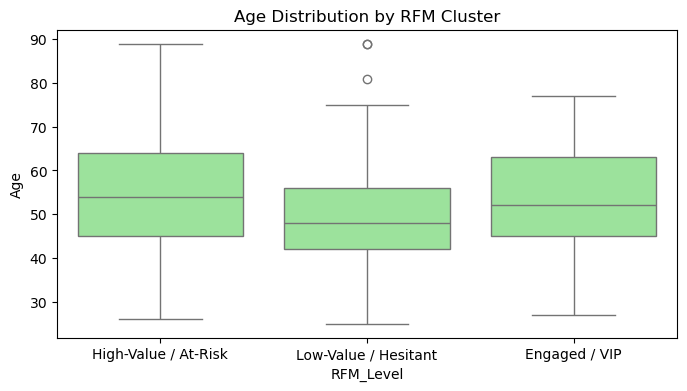

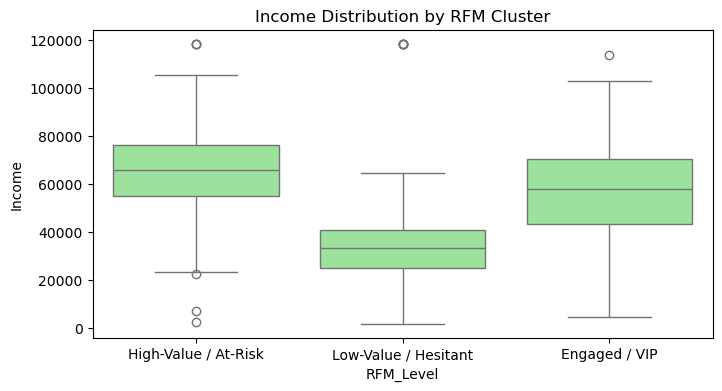

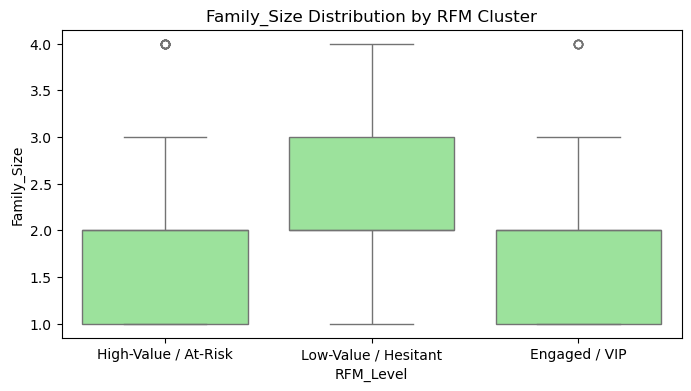

In [274]:
for col in ['Age', 'Income', 'Family_Size']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='RFM_Level', y=col, data=df,color='lightgreen')
    plt.title(f'{col} Distribution by RFM Cluster')
    plt.show()

Age: All segments show a wide age range (25–89), with Low-Value (Hesitant) customers slightly more concentrated around middle age.

Income: High-Value (At-Risk) customers have the highest median income (~65K), followed by Engaged (~50K+), while Low-Value (Hesitant) customers earn the least (~35K).

Family Size: Engaged and High-Value (At-Risk) customers tend to have slightly smaller families than Low-Value (Hesitant) customers, who are mostly in the 1–4 member range.

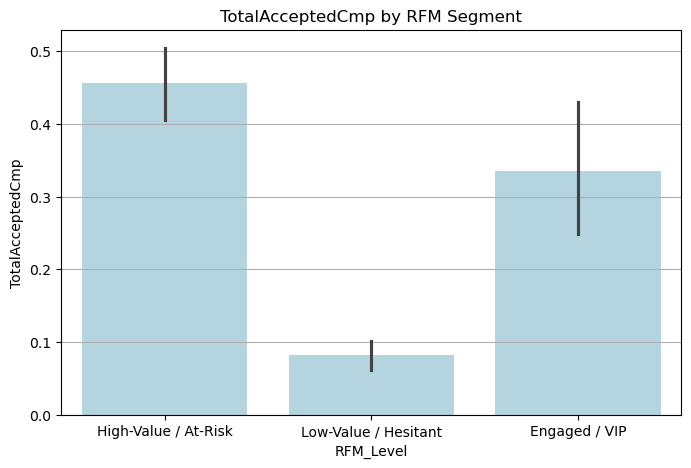

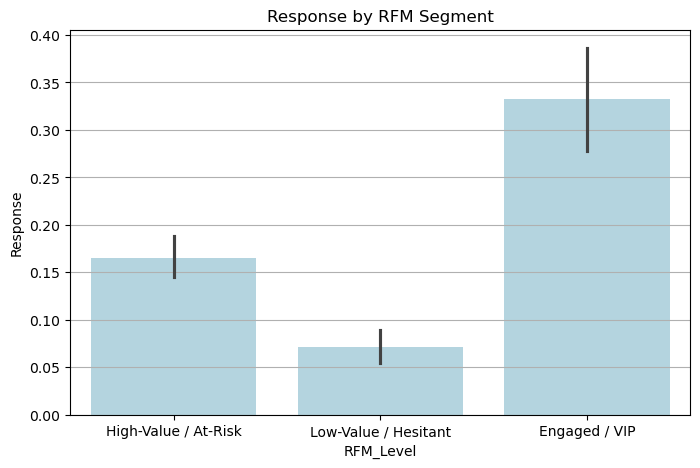

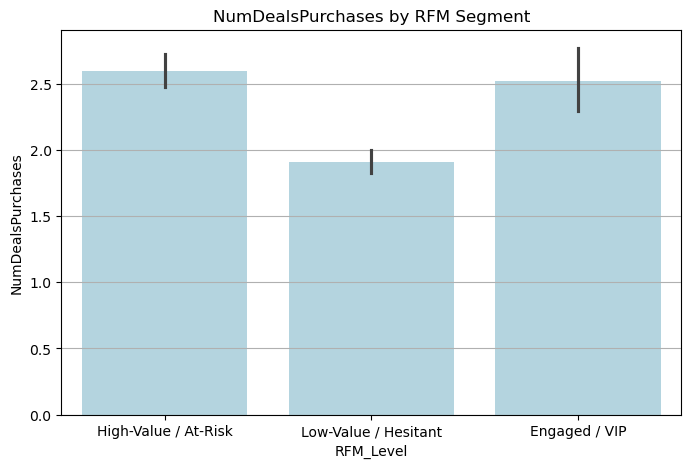

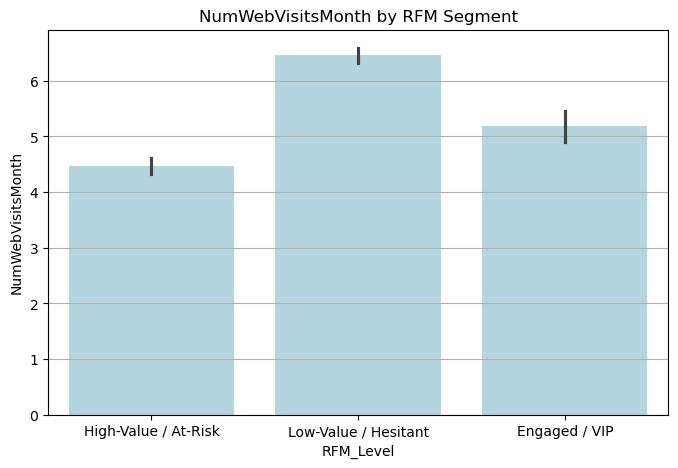

In [275]:

campaign_cols = ['TotalAcceptedCmp', 'Response', 'NumDealsPurchases', 'NumWebVisitsMonth']

for col in campaign_cols:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x='RFM_Level', y=col,color='lightblue')
    plt.title(f'{col} by RFM Segment')
    plt.grid(axis='y')
    plt.show()

Campaign Acceptance: High-Value (At-Risk) customers accepted the most offers (average 4+), Engaged customers accepted around 3 offers, and Low-Value (Hesitant) customers accepted just 1.

Response Rate: Although response rates are low overall, Engaged customers show a higher likelihood of responding (0.35) compared to High-Value (At-Risk) (0.17) and Low-Value (Hesitant) (0.15).

Deal Purchases: Engaged and High-Value (At-Risk) customers purchase more deals (average 2.5), while Low-Value (Hesitant) purchase the least (1.8). Based on error bars, Engaged customers exhibit more varied purchase behavior, similar to campaign acceptance.

Web Visits: Low-Value (Hesitant) customers visit the site the most (7 times/month), possibly browsing without converting. Engaged customers visit around 5 times, and High-Value (At-Risk) around 4.5 times, showing moderate activity.

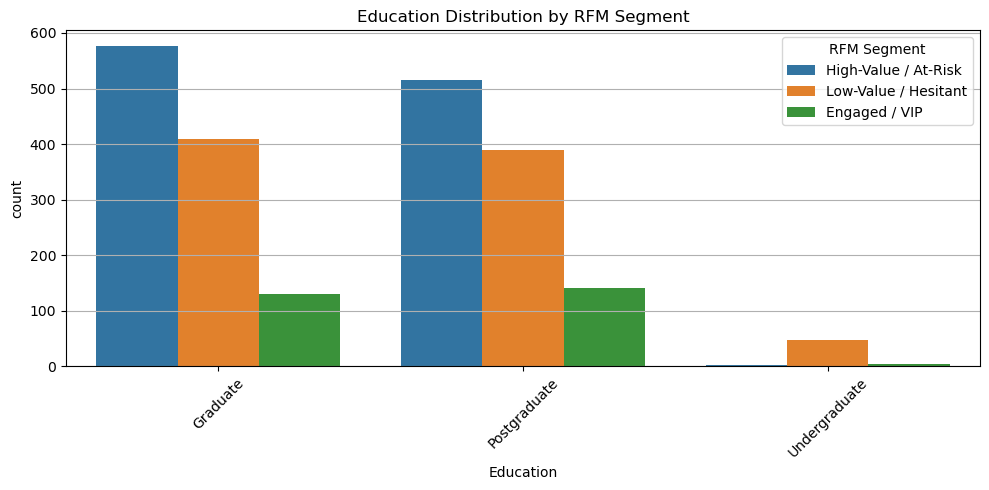

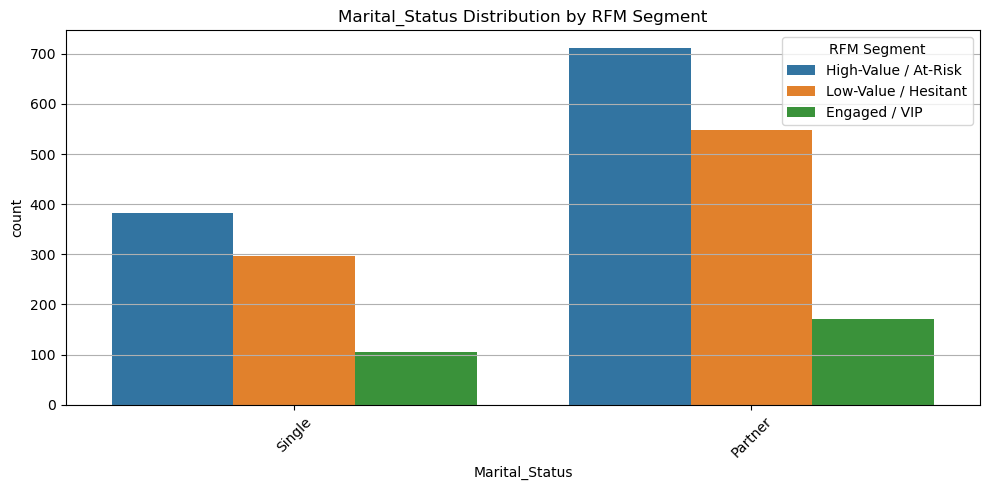

In [278]:
cat_cols = ['Education', 'Marital_Status']
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue='RFM_Level')
    plt.title(f'{col} Distribution by RFM Segment')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.legend(title='RFM Segment')
    plt.tight_layout()
    plt.show()

High-Value (At-Risk): Dominates across all categories — the largest group in every education level, marital status, and country. Common among Graduates and Postgraduates, suggesting educated but less recently active customers. Found heavily in both Single and Partnered customers.

Low-Value (Hesitant): Present across all demographics but especially dominant among Undergraduates, where it is the only segment present. Typically younger customers with lower incomes.

Engaged: The smallest segment, but highly valuable due to frequent and high-spending behavior. More prevalent among Postgraduates than Graduates or Undergraduates. Found in both Single and Partnered customers, with a slightly higher proportion of Partners.

# Conclusion

## Business Strategy per RFM Segment

High-Value (At-Risk): This segment dominates the customer base in terms of spending and frequency but hasn’t purchased recently. They represent significant revenue potential, and targeted re-engagement strategies such as personalized offers, win-back campaigns, or loyalty incentives are recommended to prevent churn.

Low-Value (Hesitant): Hesitant customers form a substantial portion of the base. They purchase infrequently and spend less overall, yet still respond occasionally to campaigns. Activation strategies like educational content, onboarding flows, and targeted promotions can help improve engagement, especially given their concentration among younger and lower-income customers.

Engaged (VIP): Although the smallest segment, Engaged customers are the most valuable due to their frequent and high-value purchases. Maintaining loyalty is key — strategies such as exclusive rewards, premium support, and early access offers will help sustain their engagement.

Demographics Insight: Undergraduate customers show weaker engagement overall, while Graduates and Postgraduates are more represented in high-value segments. Partnered customers tend to be slightly more active than single customers across all segments.
